## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [9]:
df_train = pd.read_csv("Titanic_train.csv")

## 觀察 Age

In [8]:
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals[missing_vals['missing_rate'] > 0])

          missing_rate
Age           0.198653
Cabin         0.771044
Embarked      0.002245


In [31]:
missing_index=data.isnull()
display(data[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,3
17,1,NaN,2
19,0,NaN,3
26,1,NaN,3
28,0,NaN,3
...,...,...,...
859,1,NaN,3
863,0,NaN,3
868,1,NaN,3
878,1,NaN,3


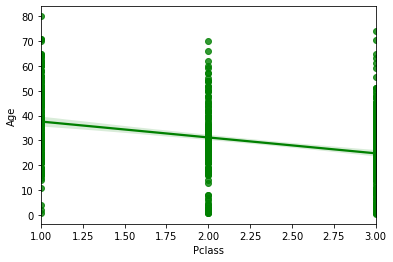

In [11]:
g = sns.regplot(x="Pclass", y="Age", color="g",data=df_train)

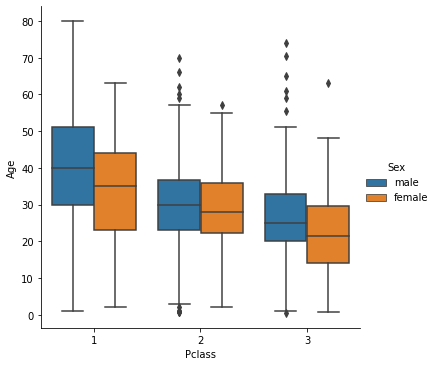

In [27]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [32]:
data=df_train[['Sex','Age','Pclass']]
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])

,0,1,2
5,1.0,22.0,3.0
17,1.0,35.0,2.0
19,0.0,26.0,3.0
26,1.0,22.0,3.0
28,0.0,26.0,3.0
...,...,...,...
859,1.0,22.0,3.0
863,0.0,26.0,3.0
868,1.0,22.0,3.0
878,1.0,22.0,3.0


In [35]:
df_filled.rename(columns={0:'Sex',1:'Age','height':'Pclass'},inplace=True)
df_filled

,Sex,Age,Pclass
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,26.0,3.0
889,1.0,26.0,1.0


In [39]:
df_filled_missing=df_filled[missing_index.values==True]
df_filled_missing

,Sex,Age,Pclass
5,1.0,22.0,3.0
17,1.0,35.0,2.0
19,0.0,26.0,3.0
26,1.0,22.0,3.0
28,0.0,26.0,3.0
...,...,...,...
859,1.0,22.0,3.0
863,0.0,26.0,3.0
868,1.0,22.0,3.0
878,1.0,22.0,3.0


In [40]:
df_filled_missing.loc[df_filled_missing['Pclass']==1]["Age"]
# 由KNN填入的值確實符合預期，Pclass==1的年齡都比較高

31     38.0
55     54.0
64     54.0
166    38.0
168    54.0
185    54.0
256    38.0
270    54.0
284    54.0
295    54.0
298    54.0
306    38.0
334    38.0
351    54.0
375    38.0
457    38.0
475    54.0
507    54.0
527    54.0
557    54.0
602    54.0
633    54.0
669    38.0
711    54.0
740    54.0
766    54.0
793    54.0
815    54.0
839    54.0
849    38.0
Name: Age, dtype: float64